In [ ]:
!pip install --upgrade pip
!pip install imgaug==0.2.6

!apt-get install poppler-utils
!pip install pdf2image


In [ ]:
import pdfplumber
import requests
from bs4 import BeautifulSoup,  SoupStrainer
from tqdm import tqdm
from pdf2image import convert_from_path 
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import random
import pdfminer
from pdfminer.layout import LAParams, LTTextBox, LTTextLineHorizontal, LTTextBoxHorizontal, LTTextLineVertical, LTTextBoxVertical
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: ignored

In [ ]:
from pdfminer.high_level import extract_pages
from pdfminer.layout import LTTextContainer, LTChar

for page_layout in extract_pages('drive/MyDrive/mtsamples_pdf/mtsamples_pdf/12.pdf'):
    for element in page_layout:
            for text_line in element:
                print(text_line)

<LTTextLineHorizontal 33.301,800.008,126.840,813.812 'Medical Specialty:\n'>
<LTTextLineHorizontal 33.301,785.604,77.805,799.407 'Autopsy \n'>
<LTTextLineHorizontal 33.301,756.796,175.723,770.599 'Sample Name:Â Autopsy - 6\n'>
<LTTextLineHorizontal 33.301,724.854,542.581,736.257 'Description:Â Multiple sharp force injuries, involving chest and abdomen, multiple incised-stab wounds of the neck, and multiple\n'>
<LTTextLineHorizontal 33.301,712.851,137.884,724.254 'incised or cutting wounds. \n'>
<LTTextLineHorizontal 33.301,700.848,190.943,712.251 '(Medical Transcription Sample Report)\n'>
<LTTextLineHorizontal 33.301,675.040,154.111,686.444 'ANATOMICAL SUMMARY\n'>
<LTTextLineHorizontal 33.301,663.037,332.338,674.440 '1. Sharp force wound of neck, left side, with transection of left internal jugular vein.\n'>
<LTTextLineHorizontal 33.301,651.034,510.742,662.437 '2. Multiple stab wounds of chest, abdomen, and left thigh: Penetrating stab wounds of chest and abdomen with right hemothorax 

TypeError: ignored

In [ ]:
from pdfminer.high_level import extract_pages
from pdfminer.layout import LTTextContainer, LTChar

for page_layout in extract_pages('drive/MyDrive/mtsamples_pdf/mtsamples_pdf/12.pdf'):
    for element in page_layout:
        if isinstance(element, LTTextContainer):
            for text_line in element:
                 print(text_line)

<LTTextLineHorizontal 33.301,800.008,126.840,813.812 'Medical Specialty:\n'>
<LTTextLineHorizontal 33.301,785.604,77.805,799.407 'Autopsy \n'>
<LTTextLineHorizontal 33.301,756.796,175.723,770.599 'Sample Name:Â Autopsy - 6\n'>
<LTTextLineHorizontal 33.301,724.854,542.581,736.257 'Description:Â Multiple sharp force injuries, involving chest and abdomen, multiple incised-stab wounds of the neck, and multiple\n'>
<LTTextLineHorizontal 33.301,712.851,137.884,724.254 'incised or cutting wounds. \n'>
<LTTextLineHorizontal 33.301,700.848,190.943,712.251 '(Medical Transcription Sample Report)\n'>
<LTTextLineHorizontal 33.301,675.040,154.111,686.444 'ANATOMICAL SUMMARY\n'>
<LTTextLineHorizontal 33.301,663.037,332.338,674.440 '1. Sharp force wound of neck, left side, with transection of left internal jugular vein.\n'>
<LTTextLineHorizontal 33.301,651.034,510.742,662.437 '2. Multiple stab wounds of chest, abdomen, and left thigh: Penetrating stab wounds of chest and abdomen with right hemothorax 

In [ ]:
datapath = 'drive/MyDrive/mtsamples_pdf/mtsamples_pdf'
dfb = pd.DataFrame(columns= ['pdf', 'width', 'height', 'linelist'])

for pdfname in tqdm(os.listdir(datapath)):
  
  with pdfplumber.open(os.path.join(datapath, pdfname), laparams={}) as pdf:
    first_page = pdf.pages[0]
    page = first_page.layout
    lines = []
    for element in page:
      
      #if isinstance(element, LTTextLineHorizontal):
        #print(element)
    
      if isinstance(element, LTTextBoxHorizontal):
        for line in element:
          for character in line:
                    if isinstance(character, LTChar):
                        if 'Bold' in character.fontname:
                            d = {'x0' : line.x0,
                            'x1' : line.x1,
                            'y0' : line.y0,
                            'y1' : line.y1,
                            'line' : line.get_text()}            
                            lines.append(d)
                            break
                
    dfb = dfb.append({'pdf': pdfname, 'width': first_page.width, 'height': first_page.height, 'linelist': lines}, ignore_index=True)

100%|██████████| 5003/5003 [26:26<00:00,  3.15it/s]


In [ ]:
dfb.to_pickle('/content/drive/MyDrive/bold_line_final.pkl')

In [ ]:
dfb = pd.read_pickle('/content/drive/MyDrive/bold_line_final.pkl')
df = pd.read_pickle('/content/drive/MyDrive/data_line_final.pkl')

In [ ]:
import cv2
test_img = cv2.imread(r'drive/MyDrive/mtsamples_pdf/mtsamples_pdf/4545.tiff')

TypeError: ignored

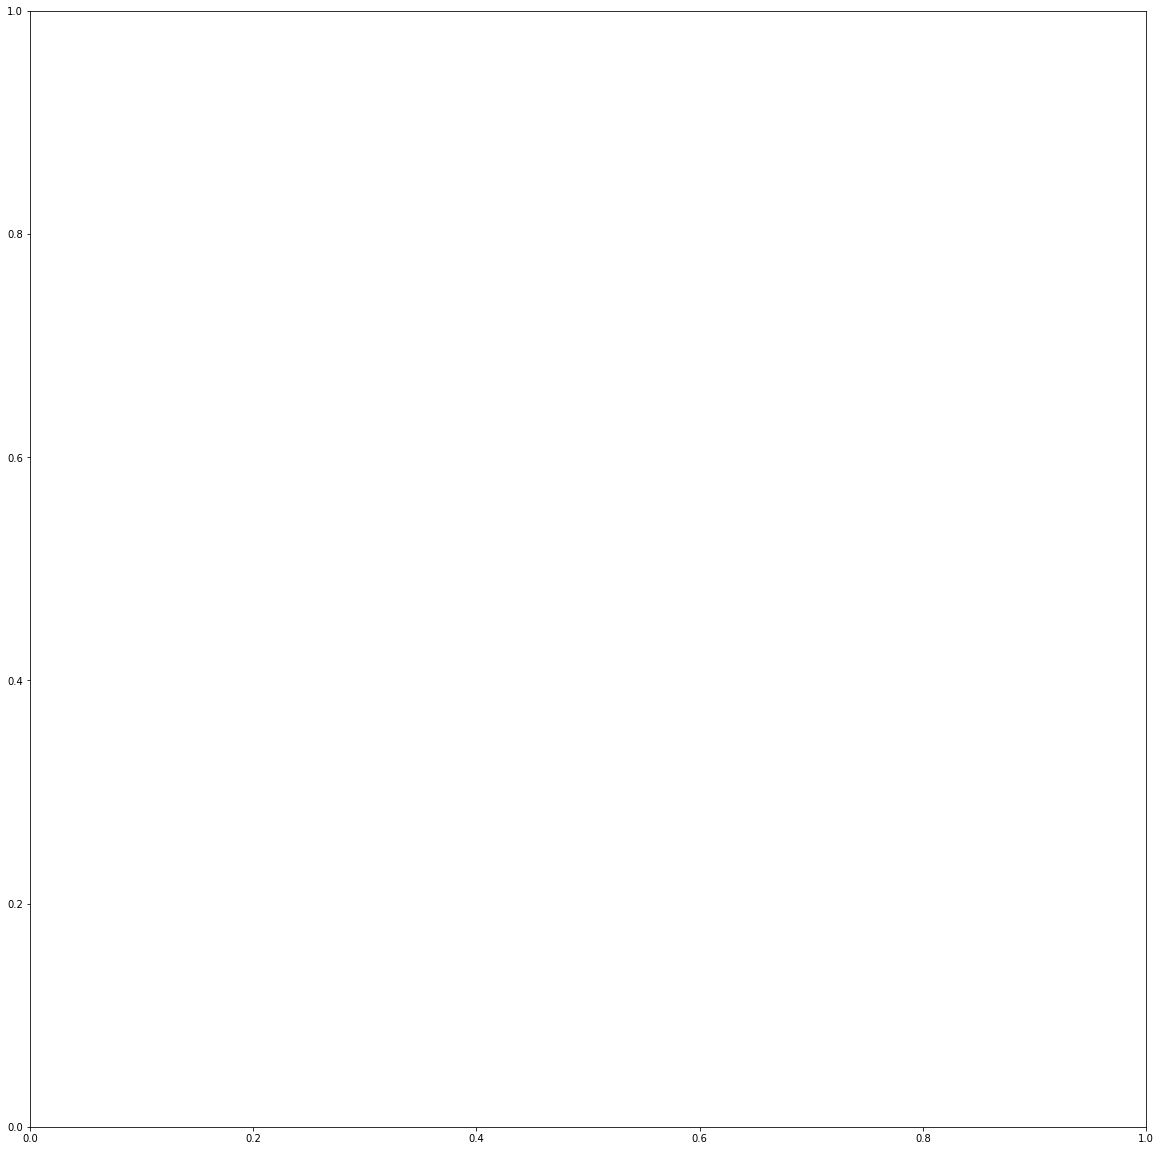

In [ ]:
import math
x_scale, y_scale = 800/595,1000/842
word = df.iloc[0]['linelist']
for idx in range(len(word)):
    x1 = math.ceil(word[idx]['x0']*x_scale)
    y1 = math.ceil(word[idx]['y0']*y_scale)
    x2 = math.ceil(word[idx]['x1']*x_scale)
    y2 = math.ceil(word[idx]['y1']*y_scale)
    test_img = cv2.rectangle(test_img, (x1, 1000-y1), (x2, 1000-y2), (255,0,0), 2)
plt.figure(figsize=(20,24))
plt.imshow(test_img, cmap='gray')

In [ ]:

!pip3 install matplotlib  

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from osgeo import gdal as GD  
import matplotlib.pyplot as mplot  
import numpy as npy  
data_set = GD.Open(r'land_shallow_topo_2048.tif')  

In [ ]:
sections = pd.DataFrame(columns= ['pdf', 'width', 'height', 'slist'])
for i in range(5003):
    flag=1
    j=0
    max=0
    xs,xe,ys,ye=0,0,0,0
    word = df.iloc[i]['linelist']
    wordb= dfb.iloc[i]['linelist']
    lines=[]
    xs=word[0]['x0']
    ys=word[0]['y1']
    for idx in range(len(word)):
        if(word[idx]['line']=="(Medical Transcription Sample Report)\n"):
            xe=max
            ye=word[idx]['y0']
            d={'x0':xs,'y0':ys,'x1':xe,'y1':ye}
            max=0
            lines.append(d)
            if(j+1>=len(wordb)):
              break
            if(wordb[j+1]['line']!=word[idx+1]['line']):
              break
            j=j+1
            flag=0
            continue
        if(flag):
            x1=word[idx]['x1']
            temp=x1
            if(max<temp):
              max=temp
            j=j+1
            continue
        if(j<len(wordb) and word[idx]['line']==wordb[j]['line']):
            xs=word[idx]['x0']
            ys=word[idx]['y1']
            j=j+1
        x1=word[idx]['x1']
        temp=x1
        if(max<temp):
            max=temp
        if(j<len(wordb) and idx<len(word)-1 and word[idx+1]['line']==wordb[j]['line']):
            xe=max
            ye=word[idx]['y0']
            d={'x0':xs,'y0':ys,'x1':xe,'y1':ye}
            max=0
            lines.append(d)
            continue
        if(j==len(wordb) and idx==len(word)-1):
            xe=max
            ye=word[idx]['y0']
            d={'x0':xs,'y0':ys,'x1':xe,'y1':ye}
            max=0
            lines.append(d)
    if(flag==0):
        sections=sections.append({'pdf': df.iloc[i]['pdf'], 'width': df.iloc[i]['width'], 'height': df.iloc[i]['height'], 'linelist': lines}, ignore_index=True)


In [ ]:
sections.to_pickle('/content/drive/MyDrive/sections.pkl')

In [ ]:
sections = pd.read_pickle('/content/drive/MyDrive/sections.pkl')

In [ ]:
import cv2
test_img = cv2.imread(r'drive/MyDrive/mtsamples_pdf/mtsamples_pdf/4545.tiff')

In [ ]:
print(sections)

Empty DataFrame
Columns: [pdf, width, height, slist]
Index: []


In [ ]:
train1 = pd.DataFrame(columns= ['pdf', 'width', 'height', 'linelist'])
train2 = pd.DataFrame(columns= ['pdf', 'width', 'height', 'linelist'])
train3 = pd.DataFrame(columns= ['pdf', 'width', 'height', 'linelist'])
test1 = pd.DataFrame(columns= ['pdf', 'width', 'height', 'linelist'])
test2 = pd.DataFrame(columns= ['pdf', 'width', 'height', 'linelist'])
test3 = pd.DataFrame(columns= ['pdf', 'width', 'height', 'linelist'])
val1 = pd.DataFrame(columns= ['pdf', 'width', 'height', 'linelist'])
val2 = pd.DataFrame(columns= ['pdf', 'width', 'height', 'linelist'])
val3 = pd.DataFrame(columns= ['pdf', 'width', 'height', 'linelist'])
for i in range(4000):
    word = sections.iloc[i]
    while(i<2000):
        train1.append(word)
    while(i<3000 and i>=2000):
        train2.append(word)
    while(i<3500 and i>=3000):
        train3.append(word)
    while(i<3800 and i>=3500):
        test1.append(word)
    while(i<4000 and i>=3800):
        test2.append(word)
    while(i<4100 and i>=4000):
        test3.append(word)
    while(i<4200 and i>=4100):
        val1.append(word)
    while(i<4250 and i>=4200):
        val2.append(word)
    while(i<4300 and i>=4250):
        val3.append(word)

In [ ]:
train1.to_pickle('C:/Users/AI03592/Downloads/Labels/train1.pkl')
train2.to_pickle('C:/Users/AI03592/Downloads/Labels/train2.pkl')
train3.to_pickle('C:/Users/AI03592/Downloads/Labels/train3.pkl')
test1.to_pickle('C:/Users/AI03592/Downloads/Labels/test1.pkl')
test2.to_pickle('C:/Users/AI03592/Downloads/Labels/test2.pkl')
test3.to_pickle('C:/Users/AI03592/Downloads/Labels/test3.pkl')
val1.to_pickle('C:/Users/AI03592/Downloads/Labels/val1.pkl')
val2.to_pickle('C:/Users/AI03592/Downloads/Labels/val2.pkl')
val3.to_pickle('C:/Users/AI03592/Downloads/Labels/val3.pkl')

In [ ]:
loc='drive/MyDrive/'
